In [34]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [36]:
# Generate summary statistics
market_data_df.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [37]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Select the numerical columns (update this as per your dataset)
numerical_columns = market_data_df.select_dtypes(include=['float64', 'int64']).columns

# Apply the scaler to the numerical columns
market_data_df[numerical_columns] = scaler.fit_transform(market_data_df[numerical_columns])

# Preview the normalized data
display(market_data_df.head())
print(market_data_df.index)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')


In [38]:
# Create a DataFrame with the scaled data
scaled_data = pd.DataFrame(market_data_df[numerical_columns], columns=numerical_columns)

# The index is already 'coin_id', no need to copy it as a column
scaled_data.index.name = 'coin_id'  # Ensure the index is named correctly for clarity

# Display a sample of the DataFrame
display(scaled_data.head())



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [39]:
# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
display(elbow_df)


c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


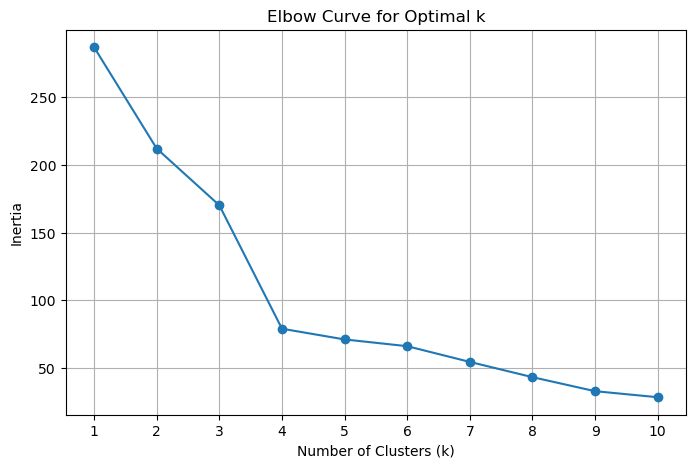

In [41]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-')
plt.title("Elbow Curve for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(elbow_df["k"])  # Ensures all k values are displayed
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for `k` is 4. This is where the biggest drop happens.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [50]:
# Initialize the K-Means model using the best value for k
optimal_k = 4
# Initialize the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(scaled_data)

# Get the cluster centers (optional)
cluster_centers = kmeans.cluster_centers_

# Get the labels (cluster assignments) for each data point
labels = kmeans.labels_

# Display the labels (cluster assignments) for each data point
print(labels)

# Optionally, you can add the cluster labels to your DataFrame for analysis
scaled_data['Cluster'] = labels

# Display the first few rows with the assigned clusters
display(scaled_data.head())


[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [51]:
# Fit the K-Means model using the scaled data
predicted_clusters = kmeans.predict(scaled_data)

In [52]:
# Predict the clusters to group the cryptocurrencies using the scaled data
scaled_data['Predicted_Cluster'] = predicted_clusters


# View the resulting array of cluster values.
display(scaled_data.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster,Predicted_Cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0,0


In [53]:
# Create a copy of the DataFrame
scaled_data_copy = scaled_data.copy()

In [54]:
# Add a new column with the predicted clusters to the DataFrame
scaled_data_copy['Predicted_Cluster'] = predicted_clusters

# Display sample data
display(scaled_data_copy.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster,Predicted_Cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0,0


C:\Users\camer\AppData\Local\Temp\ipykernel_14392\3329504098.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


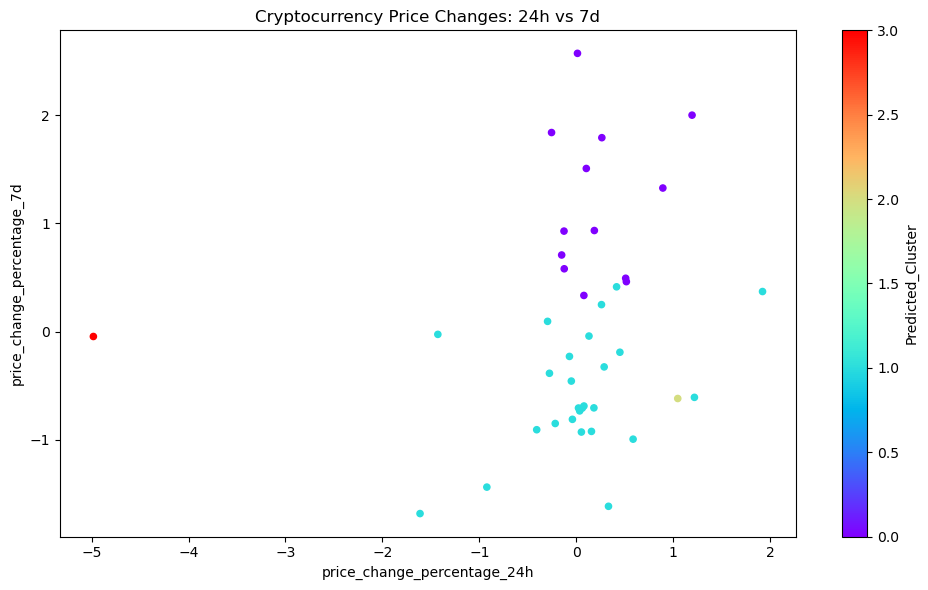

In [55]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
ax = scaled_data_copy.plot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="Predicted_Cluster",  # Use predicted clusters for color
    colormap="rainbow",    # Set the color map to "rainbow"
    figsize=(10, 6),       # Set the figure size
    title="Cryptocurrency Price Changes: 24h vs 7d",  # Add title
)

# Display the plot
ax.figure.tight_layout()
ax.figure.show()


### Optimize Clusters with Principal Component Analysis.

In [57]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data (optional, if needed immediately)
pca.fit(scaled_data)

# Display the PCA instance
print(pca)

PCA(n_components=3)


In [58]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(
    pca_data,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'],
    index=scaled_data.index
)


# View the first five rows of the DataFrame.
display(pca_df.head(5))

,Principal Component 1,Principal Component 2,Principal Component 3
coin_id,,,
bitcoin,-1.240029,0.662441,0.504043
ethereum,-1.064787,0.356097,1.037542
tether,-0.115444,-0.330419,-0.767714
ripple,-0.148123,-0.391832,-0.621214
bitcoin-cash,-2.182107,1.636283,1.563048


In [59]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.2%}")
    
# Display the total variance explained by the three components
total_variance = explained_variance.sum()
print(f"\nTotal Variance Explained by 3 Components: {total_variance:.2%}")

Principal Component 1: 39.58%
Principal Component 2: 31.60%
Principal Component 3: 17.51%

Total Variance Explained by 3 Components: 88.70%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [60]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_data_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
pca_data_df["coin_id"] = scaled_data.index

# Set the coin_id column as the index
pca_data_df.set_index("coin_id", inplace=True)

# Display sample data
display(pca_data_df.head())

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-1.240029,0.662441,0.504043
ethereum,-1.064787,0.356097,1.037542
tether,-0.115444,-0.330419,-0.767714
ripple,-0.148123,-0.391832,-0.621214
bitcoin-cash,-2.182107,1.636283,1.563048


### Find the Best Value for k Using the PCA Data

In [61]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the PCA DataFrame
    kmeans.fit(pca_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
display(elbow_df)


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,282.167021
1,2,204.530041
2,3,124.179784
3,4,44.688356
4,5,41.583147
5,6,31.933490
6,7,25.509204
7,8,18.322148
8,9,15.033733
9,10,11.908606


<Axes: title={'center': 'Elbow Curve for PCA Data'}, xlabel='Number of Clusters (k)', ylabel='Inertia'>

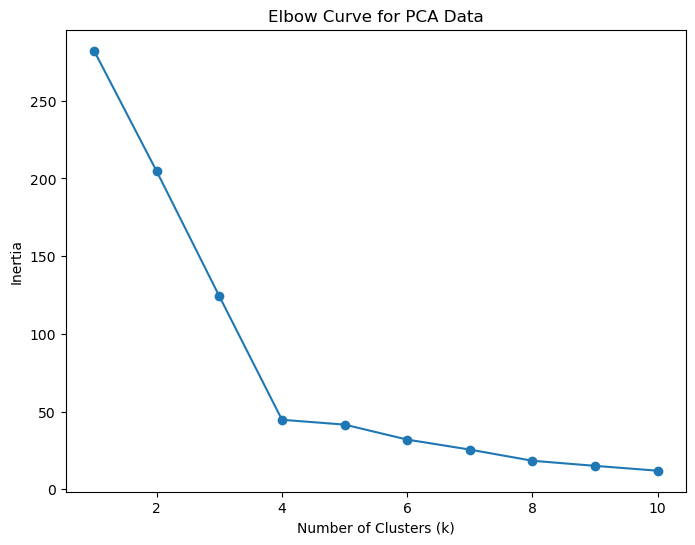

In [62]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(
    x="k",
    y="inertia",
    title="Elbow Curve for PCA Data",
    kind="line",
    marker="o",
    figsize=(8, 6),
    xlabel="Number of Clusters (k)",
    ylabel="Inertia",
    legend=False
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** its close bettween the first 4 values. 4 seems to still be the best k value however.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it does not differ but it is closer between 1-4 now.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [63]:
# Initialize the K-Means model using the best value for k
optimal_k = 4 

# Initialize the K-Means model
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)

In [64]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

# Predict the clusters for the PCA data
pca_clusters = kmeans_pca.predict(pca_df)

# Display the predicted cluster values
print(pca_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


c:\Users\camer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


In [70]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['Cluster'] = pca_clusters

# Display sample data
display(pca_clustered_df.head())

,Principal Component 1,Principal Component 2,Principal Component 3,Cluster
coin_id,,,,
bitcoin,-1.240029,0.662441,0.504043,0
ethereum,-1.064787,0.356097,1.037542,0
tether,-0.115444,-0.330419,-0.767714,2
ripple,-0.148123,-0.391832,-0.621214,2
bitcoin-cash,-2.182107,1.636283,1.563048,0


In [72]:
import hvplot.pandas
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_clustered_df.hvplot.scatter(x="Principal Component 1", y="Principal Component 2", c="Cluster", cmap='rainbow', title="PCA Clusters")


:Scatter   [Principal Component 1]   (Principal Component 2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [73]:
# Use the columns from the original scaled DataFrame as the index.
pca_clustered_df.set_index(scaled_data.index, inplace=True)

# Verify the changes by displaying the first few rows
pca_clustered_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Cluster
coin_id,,,,
bitcoin,-1.240029,0.662441,0.504043,0
ethereum,-1.064787,0.356097,1.037542,0
tether,-0.115444,-0.330419,-0.767714,2
ripple,-0.148123,-0.391832,-0.621214,2
bitcoin-cash,-2.182107,1.636283,1.563048,0


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
Principal Component PC1:
  Strongest Positive Feature: price_change_percentage_1y with loading 0.5151284057865477
  Strongest Negative Feature: price_change_percentage_24h with loading -0.4286645411525586

Principal Component PC2:
  Strongest Positive Feature: price_change_percentage_30d with loading 0.5898881334921562
  Strongest Negative Feature: Cluster with loading -0.03689361886227739

Principal Component PC3:
  Strongest Positive Feature: price_change_percentage_7d with loading 0.6954548762326908
  Strongest Negative Feature: price_change_percentage_24h with loading -0.3367635254652013
    

In [75]:
loadings = pca.components_

# Create a DataFrame to display the loadings for each component
loadings_df = pd.DataFrame(loadings, columns=scaled_data.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Display the loadings DataFrame
display(loadings_df)

# For each principal component, get the feature with the strongest positive and negative loading
for i, component in enumerate(loadings_df.index):
    # Get the feature with the highest positive loading for the component
    strongest_positive = loadings_df.loc[component].idxmax()
    strongest_positive_value = loadings_df.loc[component].max()

    # Get the feature with the highest negative loading for the component
    strongest_negative = loadings_df.loc[component].idxmin()
    strongest_negative_value = loadings_df.loc[component].min()

    print(f"Principal Component {component}:")
    print(f"  Strongest Positive Feature: {strongest_positive} with loading {strongest_positive_value}")
    print(f"  Strongest Negative Feature: {strongest_negative} with loading {strongest_negative_value}")
    print()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster,Predicted_Cluster
PC1,-0.428665,-0.231876,-0.185982,0.027592,0.190079,0.497812,0.515128,0.298182,0.298182
PC2,0.196655,0.196200,0.512655,0.589888,0.507987,0.221602,0.046569,-0.036894,-0.036894
PC3,-0.336764,0.695455,0.261049,-0.186579,-0.312172,0.159981,0.320572,-0.192566,-0.192566


Principal Component PC1:
  Strongest Positive Feature: price_change_percentage_1y with loading 0.5151284057865477
  Strongest Negative Feature: price_change_percentage_24h with loading -0.4286645411525586

Principal Component PC2:
  Strongest Positive Feature: price_change_percentage_30d with loading 0.5898881334921562
  Strongest Negative Feature: Cluster with loading -0.03689361886227739

Principal Component PC3:
  Strongest Positive Feature: price_change_percentage_7d with loading 0.6954548762326908
  Strongest Negative Feature: price_change_percentage_24h with loading -0.33676352546520133

